# Autoencoderサンプル(Pytorch)
作成日2021/05/02 

参考
- https://www.youtube.com/watch?v=zp8clK9yCro

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import concat
Concat = concat.concat("Obrid_AE", "data")
Concat.output_data("sample_data")
Concat = concat.concat("Obrid_AE", "test")
Concat.output_data("sample_test")

## データセットの読み込み

In [5]:
transform = transforms.ToTensor()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
mnist_data = datasets.MNIST(root = './data', train = True, download =True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size = 64, shuffle = True)

In [20]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))
print(torch.min(labels), torch.max(labels))

tensor(0.) tensor(1.)
tensor(0) tensor(9)


https://www.atmarkit.co.jp/ait/articles/2005/12/news015_2.html

## NormalAutoEncoder

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N(バッチサイズ), 784(ピクセル数64x64)
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 12), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(12, 3), #N,12 -> N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(12, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 128), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(128, 28*28), #N,12 -> N,3
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

## CNNAutoEncoder

In [37]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        #N,784 -> N,128
        self.encoder = nn.Sequential( 
            nn.Conv2d(1, 16, 3, stride=2, padding=1),#N, 1, 28, 28 -> N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),#N, 16, 14, 14 -> N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)#N, 32, 7, 7 -> N, 64, 1, 1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [38]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [39]:
outputs = []
num_epochs = 10
for epoch in range(num_epochs):
    for (img, _) in data_loader:
#         img = img.reshape(-1, 28*28) #一次元の場合
        recon = model(img)
        loss = criterion(recon, img)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0089
Epoch:2, Loss:0.0061
Epoch:3, Loss:0.0048
Epoch:4, Loss:0.0041
Epoch:5, Loss:0.0032
Epoch:6, Loss:0.0032
Epoch:7, Loss:0.0031
Epoch:8, Loss:0.0031
Epoch:9, Loss:0.0029
Epoch:10, Loss:0.0026


IndexError: list index out of range

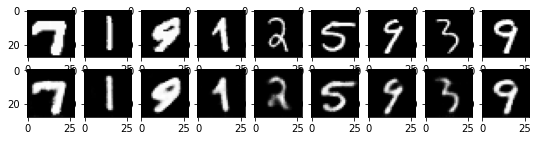

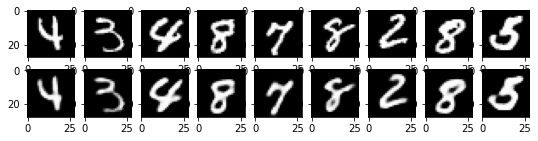

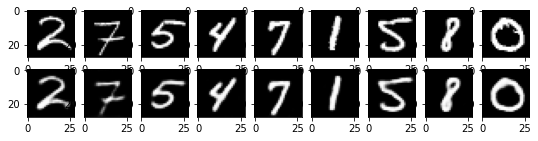

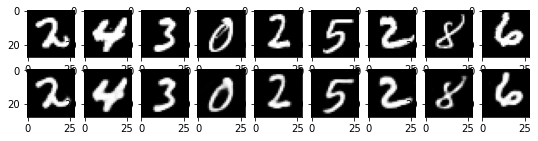

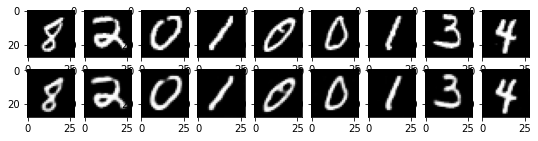

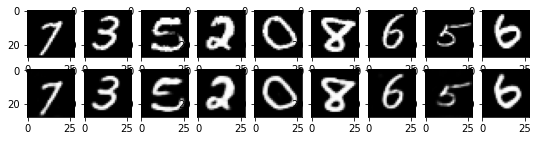

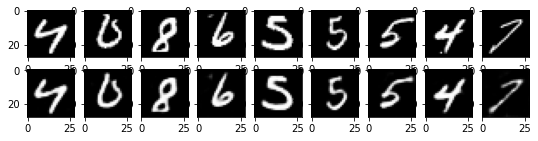

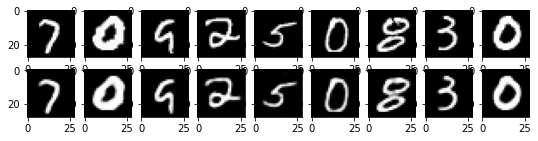

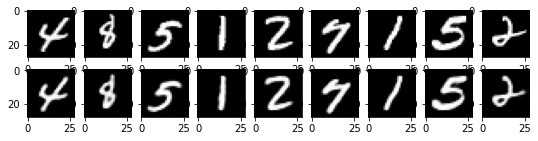

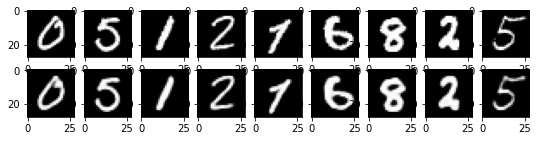

<Figure size 648x144 with 0 Axes>

In [40]:
for k in range(0, max_epochs, 1):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
#         item = item.reshape(-1, 28, 28)#一次元の場合
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
#         item = item.reshape(-1, 28,  28)#一次元の場合
        plt.imshow(item[0])

- 
# 輝度分布のデータで学習
CSVから読み取る場合＋取得データをNumpy形式で保存

In [12]:
import numpy as np
import csv
import pandas as pd
root_path = "Obrid_AE/test_data/"
test_data_path = root_path + "data0503.csv"
#---------------CSVから読み取る----------------------------
data_df = pd.read_csv(test_data_path, engine="python")
data = data_df.values
#---------------CSVから読み取る----------------------------
print(data.shape)
print(data[0])
#Numpy形式で保存https://note.nkmk.me/python-numpy-load-save-savez-npy-npz/
np.save(root_path + "np_data", data)

(100, 256)
[ 20  24  22  26  24  28  30  24  30  30  32  32  36  34  36  40  36  40
  40  42  42  42  48  50  46  48  50  54  52  54  52  56  54  60  58  58
  56  58  60  60  60  56  58  54  58  58  56  50  52  50  50  48  46  46
  44  44  42  46  40  38  38  34  36  32  32  32  30  30  32  30  32  32
  32  32  30  30  30  32  26  30  30  30  30  28  26  30  30  24  30  32
  30  30  30  32  32  36  32  30  30  30  36  34  34  32  32  34  34  28
  32  34  28  34  38  42  42  44  46  48  50  58  60  64  66  68  72  74
  80  72  80  88  90  90  92  90  94  94  90  90  84  88  84  86  88  84
  84  80  82  82  78  78  74  74  70  66  66  64  64  64  60  56  54  52
  50  46  44  44  38  36  26  26  28  26  22  20  16  14  14  10   6   8
  10  10   8   6   8   6   8   6  10   8  12  10  10  10  10  10  10  10
  12  10   8  12  10  12  12  14  10  16  12  14  14  14  16  16  18  22
  22  22  24  30  30  34  34  38  40  46  48  52  54  42  58  64  68  68
  70  72  76  72  78  80  86  90  88  94

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
#---------------Numpy形式から読み取る----------------------------
data = np.load(root_path + "np_data" + ".npy")
print(data.max(), data.min())
data = (data - data.min()) / (data.max() - data.min())
#---------------Numpy形式から読み取る----------------------------
#エポック数とエポック自体のサイズ
epoch_num = 100
epoch_size = 84
list=[]
for i in range(epoch_num):
    #ランダムに配列の番号をランダムに指定
    make_epoch = np.random.randint(0, len(data), (epoch_size))
    #ランダムに指定した番号のデータを選択、リストに追加
    list.append(data[make_epoch, :])
test_data = np.array(list)
# conv1を適用するために３次元
test_data = test_data[:, :, np.newaxis, np.newaxis, :]
# test_data = np.array(list)/1024
test_data.shape

428 0


(100, 84, 1, 1, 256)

In [14]:
data.max()

1.0

## NormalAutoEncoder

In [15]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super().__init__()
#         #N(バッチサイズ), 784(ピクセル数64x64)
#         self.encoder = nn.Sequential(
#             nn.Linear(256, 128), #N,784 -> N,128
#             nn.ReLU(),
#             nn.Linear(128, 64), #N,128 -> N,64
#             nn.ReLU(),
#             nn.Linear(64, 12), #N,64 -> N,12
#             nn.ReLU(),
#             nn.Linear(12, 3), #N,12 -> N,3
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(3, 12), #N,784 -> N,128
#             nn.ReLU(),
#             nn.Linear(12, 64), #N,128 -> N,64
#             nn.ReLU(),
#             nn.Linear(64, 128), #N,64 -> N,12
#             nn.ReLU(),
#             nn.Linear(128, 256), #N,12 -> N,3
#             # nn.Sigmoid()
#         )
    
#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

##  一次元CNN実装中

In [16]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N(バッチサイズ), 784(ピクセル数64x64)
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels = 1, out_channels = 1, kernel_size = 7, stride = 5),
            # nn.MaxPool1d(kernel_size=5, stride= 3)
            nn.ReLU(),
            nn.Conv1d(in_channels = 1, out_channels = 1, kernel_size = 5, stride = 3),
            # nn.ReLU(),
            # nn.Flatten(0, -1),
            # nn.Linear(16, 12), #N,64 -> N,12
            # nn.ReLU(),
            # nn.Linear(12, 3), #N,12 -> N,3
        )
        self.decoder = nn.Sequential(
            # nn.Linear(3, 12), #N,784 -> N,128
            # nn.ReLU(),
            # nn.Linear(12, 16), #N,128 -> N,64
            # nn.ReLU(),
            # nn.Unflatten(0, (1, 1 ,16)),
            nn.ConvTranspose1d(in_channels = 1, out_channels = 1, kernel_size = 5, stride = 3, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels = 1, out_channels = 1, kernel_size = 7, stride = 5, padding = 1, output_padding=1),
            # nn.Flatten(0, -1),
            # nn.ReLU(),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [17]:
#カーネルサイズとストライドから入出力の関係を算出
cnnInput = 256
cnnKernelSize = 5
cnnStride = 3
cnnoutput = (cnnInput - cnnKernelSize + 1)/3
cnnoutput

84.0

## 学習

In [18]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

outputs = []
#テンソル型に変換
test_data = torch.from_numpy(test_data.astype(np.float32)).clone()
for epoch in test_data:
    for data in epoch:
        recon = model(data)
        print(recon.shape, data.shape)
        loss = criterion(recon, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, data, recon))

orch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1,

In [19]:
print(recon.max(), recon.min())

tensor(0.4522, grad_fn=<MaxBackward1>) tensor(0.0324, grad_fn=<MinBackward1>)


00, 0.0000, 0.0047, 0.0000,
        0.0047, 0.0000, 0.0047, 0.0047, 0.0000, 0.0047, 0.0000, 0.0047, 0.0047,
        0.0047, 0.0047, 0.0000, 0.0047, 0.0000, 0.0093, 0.0000, 0.0047, 0.0000,
        0.0047, 0.0000, 0.0093, 0.0047, 0.0047, 0.0140, 0.0000, 0.0140, 0.0234,
        0.0140, 0.0093, 0.0187, 0.0093, 0.0187, 0.0234, 0.0140, 0.0187, 0.0187,
        0.0187, 0.0280, 0.0234, 0.0327, 0.0327, 0.0234, 0.0280, 0.0327, 0.0187,
        0.0280, 0.0327, 0.0280, 0.0374, 0.0374, 0.0374, 0.0327, 0.0421, 0.0374,
        0.0327, 0.0327, 0.0280, 0.0327, 0.0467, 0.0467, 0.0421, 0.0467, 0.0467,
        0.0467, 0.0374, 0.0374, 0.0467, 0.0421, 0.0514, 0.0467, 0.0467, 0.0514,
        0.0514, 0.0421, 0.0561, 0.0467, 0.0561, 0.0421, 0.0514, 0.0514, 0.0561,
        0.0561, 0.0561, 0.0561, 0.0654, 0.0561, 0.0561, 0.0514, 0.0607, 0.0514,
        0.0561, 0.0561, 0.0607, 0.0607, 0.0607, 0.0607, 0.0561, 0.0607, 0.0654,
        0.0654, 0.0561, 0.0607, 0.0654, 0.0701, 0.0654, 0.0654, 0.0794, 0.0888,
        0.09

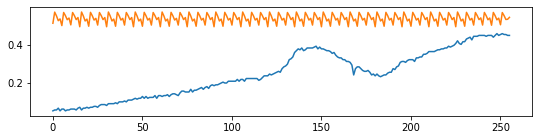

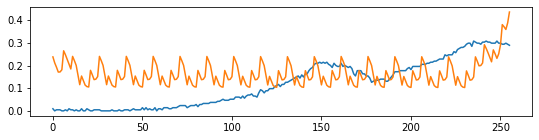

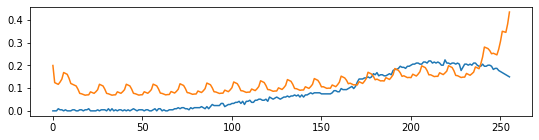

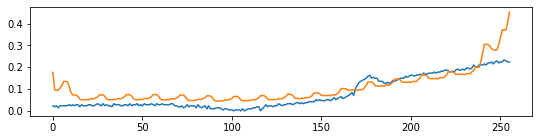

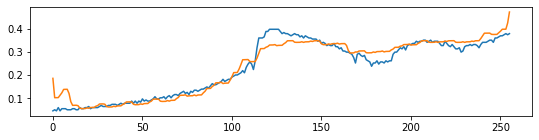

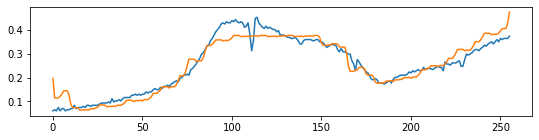

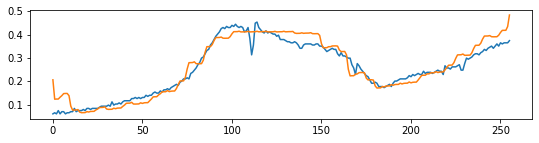

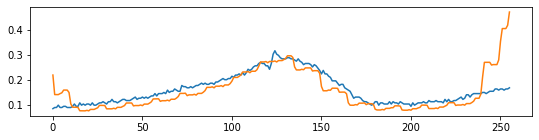

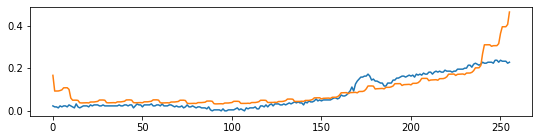

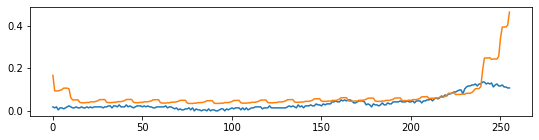

In [20]:
for k in range(0, epoch_num, int(epoch_num/10)):
    plt.figure(figsize=(9, 2))
    datas = outputs[k][1].flatten().detach().numpy()
    recon = outputs[k][2].flatten().detach().numpy()
    print(data.flatten())
    print(recon.flatten())
    plt.plot(datas)
    plt.plot(recon)

## 異常検知

In [21]:
#データの読み込み
test_path = "Obrid_AE/test_data/test0503.csv"
test_df = pd.read_csv(test_path, engine="python").values
# test = test_df.values
# test = test_df.values/1024
test = (test_df - test_df.min()) / (test_df.max() - test_df.min())
print(test.shape)
print(test[0])
data_path = "Obrid_AE/test_data/data0503.csv"
data_df = pd.read_csv(data_path, engine="python").values
# Data = data_df.values
# Data = data_df.values/1024
Data = (data_df - data_df.min()) / (data_df.max() - data_df.min())
print(Data.shape)
print(Data[0])

(50, 256)
[0.01587302 0.02040816 0.01814059 0.02267574 0.01814059 0.01814059
 0.02040816 0.01814059 0.01587302 0.01814059 0.01814059 0.01814059
 0.02040816 0.01587302 0.01814059 0.02040816 0.01587302 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.01814059 0.01814059
 0.01814059 0.01814059 0.01587302 0.01814059 0.02040816 0.01814059
 0.01814059 0.01814059 0.01814059 0.02040816 0.01587302 0.01814059
 0.01587302 0.01360544 0.01814059 0.01587302 0.01587302 0.01814059
 0.01814059 0.01587302 0.01814059 0.01814059 0.01814059 0.01587302
 0.01814059 0.01814059 0.02040816 0.01814059 0.02267574 0.01814059
 0.01814059 0.01587302 0.02040816 0.02494331 0.02040816 0.02267574
 0.02267574 0.02040816 0.02494331 0.02267574 0.02721088 0.02494331
 0.02267574 0.02494331 0.02947846 0.02721088 0.02947846 0.03174603
 0.03174603 0.03401361 0.02947846 0.03174603 0.02721088 0.02947846
 0.02947846 0.03174603 0.03401361 0.03174603 0.03174603 0.03174603
 0.02947846 0.03401361 0.03401361 0.02721088 0.03401

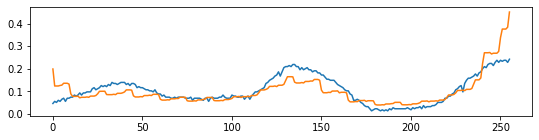

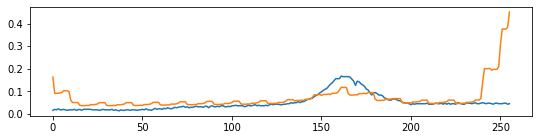

In [22]:
data0 =  torch.from_numpy((Data[0]).astype(np.float32)).clone()
test0 =  torch.from_numpy((test[0]).astype(np.float32)).clone()

plt.figure(figsize=(9, 2))
# data = data0.numpy()
data = data0[np.newaxis, np.newaxis, :]
recon = model(data).detach().numpy()
plt.plot(data0.numpy())
plt.plot(recon.flatten())
plt.show()

plt.figure(figsize=(9, 2))
# data = test0.numpy()
data = test0[np.newaxis, np.newaxis, :]
recon = model(data).detach().numpy()
plt.plot(test0.numpy())
plt.plot(recon.flatten())

## 一次元CNNでモデル作成

単なるAEだと直立時の波形の特徴を学習できていない
データ数が少なくて過学習になっている
多層化もしくは層の組み合わせを考える必要がある